# Creating a Dog Photo as a Painting

<p style="font-size: 16px;">Neural style transfer is an innovative technique in the field of computer vision and deep learning that allows the fusion of the stylistic elements of one image with the content of another. This process leverages convolutional neural networks (CNNs) to extract and reapply artistic styles from a source image to a target image, creating visually stunning results that blend the characteristics of both inputs. In this project, I utilize Google's pre-trained neural style transfer model to achieve high-quality artistic transformations. By using this advanced model, the project showcases the practical applications of neural style transfer, demonstrating how pre-trained models can simplify and enhance the process of digital artistry and image processing. The experiments conducted highlight the balance between preserving content and replicating style, underscoring the transformative potential of neural networks in the realm of creative technology.</p>

## For real tutorial

<a style="font-size:16px" href="https://www.tensorflow.org/tutorials/generative/style_transfer">Tutorial</a>

In [1]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
style_path = tf.keras.utils.get_file("fulfilment-stoclet-frieze-gustav-klimt.jpg","https://render.fineartamerica.com/images/images-profile-flow/400/images/artworkimages/mediumlarge/1/fulfilment-stoclet-frieze-gustav-klimt.jpg")
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')

46279/46279 [==============================] - 0s 0us/step


In [5]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [6]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

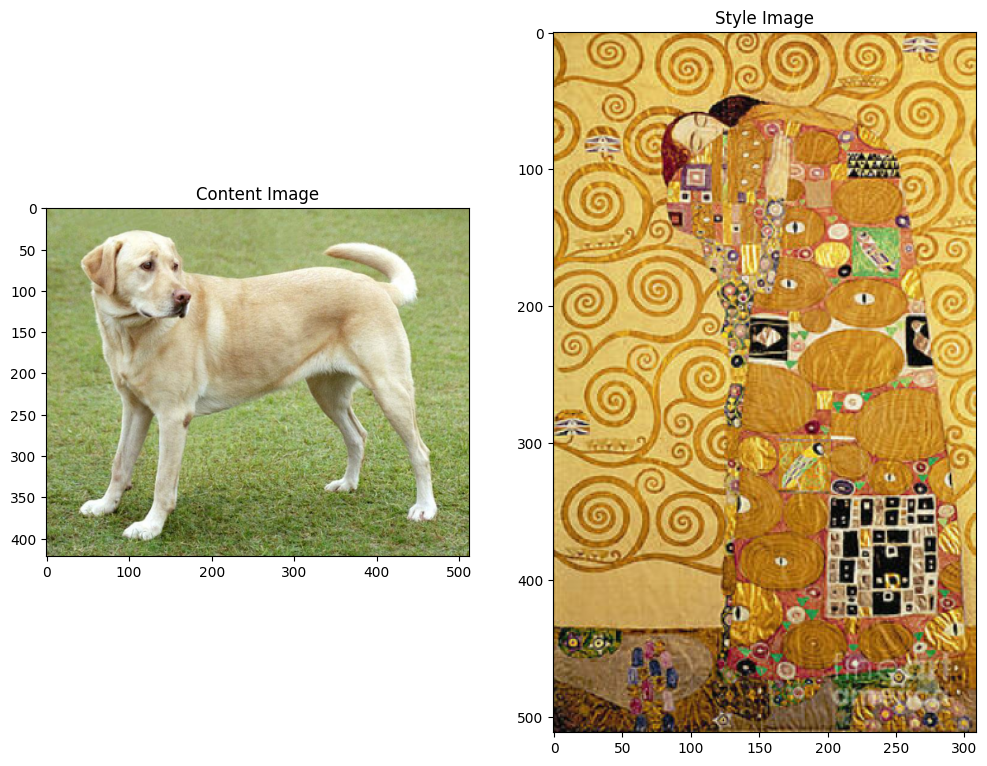

In [7]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

<p style="font-size: 20px">I think it'll be a pretty nice picture.</p>

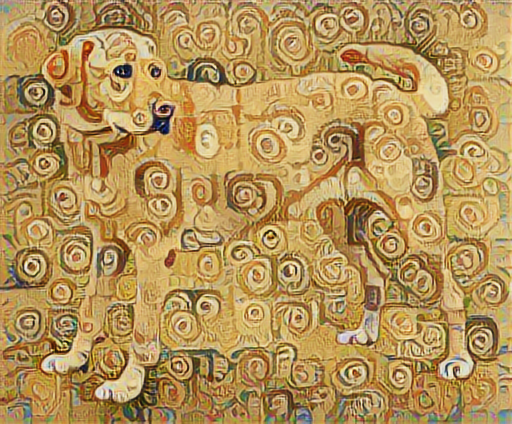

In [8]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

<p style="font-size:16px;">In conclusion, the neural style transfer project utilizing Google's pre-trained model has demonstrated the remarkable capabilities of deep learning in merging artistic styles with diverse image contents. The use of a pre-trained model not only streamlined the implementation process but also ensured high-quality results, showcasing the power and accessibility of advanced neural networks. Through various experiments, the project highlighted the delicate balance between maintaining the structural integrity of the original content while seamlessly integrating the stylistic features of the source image. This exploration reaffirms the potential of neural style transfer in transforming digital artistry, offering new creative avenues for artists, designers, and technologists alike. The success of this project underscores the broader implications of artificial intelligence in the creative industries, paving the way for further innovations and applications in the field.</p>